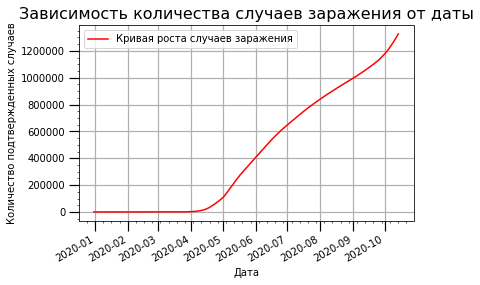

In [34]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import  matplotlib.dates as mdates
import matplotlib.ticker as ticker


data_path = "owid-covid-data.csv"
data = pd.read_csv(data_path, sep = ',')
data['date'] = pd.to_datetime(data['date'], format="%Y-%m-%d")
russia_data_set = data.loc[data.location == "Russia"]

def showCasesDependOnTheDate():
    fig, ax = plt.subplots()
    ax.set_title('Зависимость количества случаев заражения от даты', fontsize=16)
    ax.set_xlabel('Дата', fontsize=10)
    ax.set_ylabel('Количество подтвержденных случаев', fontsize=10)
    ax.grid(which='major', linewidth=1.2)
    ax.plot(russia_data_set['date'], russia_data_set['total_cases'],color = "r", label='Кривая роста случаев заражения')
    ax.legend()
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='major', length=10, width=1.2)
    plt.gcf().autofmt_xdate()
    plt.show()
    
showCasesDependOnTheDate()

На графике отражена динамика роста числа случаев заболевания в России.

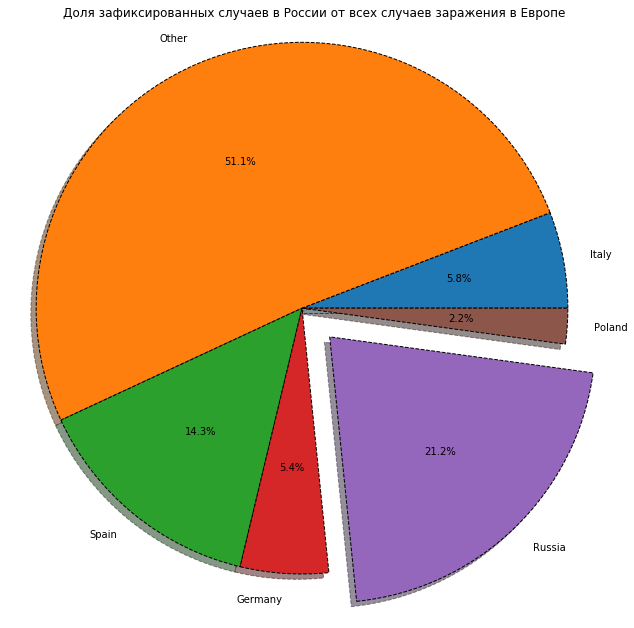

In [53]:
def createPieDiagram():
    set_of_countries = set(data[data["continent"] == "Europe"]["location"].values)
    total_cases_in_europe = 0
    total_cases_in_Italy = 0
    total_cases_in_Spain = 0
    total_cases_in_Germany = 0
    total_cases_in_Poland = 0
    total_cases_in_Russia = 0

    for country in set_of_countries:
        total_cur_country = data[data["location"] == country]["total_cases"].max()
        total_cases_in_europe += total_cur_country
        if country == "Germany":
            total_cases_in_Germany = total_cur_country
        elif country == "Poland":
            total_cases_in_Poland = total_cur_country
        elif country == "Spain":
            total_cases_in_Spain = total_cur_country
        elif country == "Italy":
            total_cases_in_Italy = total_cur_country
        elif country == "Russia":
            total_cases_in_Russia = total_cur_country

    values = [  total_cases_in_Italy,
                total_cases_in_Spain,
                total_cases_in_Germany,
                total_cases_in_Russia,
                total_cases_in_Poland ]
    values = [int(value) for value in values]
    other = int(total_cases_in_europe)
    for i in values:
        other -= i
        
    values.insert(1,other)
    labels = ["Italy",
              "Other",
              "Spain",
              "Germany",
              "Russia",
              "Poland"]
    explode = (0, 0, 0, 0, 0.15, 0)
    fig,ax = plt.subplots(figsize=(11, 11))
    ax.set_title("Доля зафиксированных случаев в России от всех случаев заражения в Европе", fontsize=12 )
    ax.pie(x=values, labels=labels, autopct='%1.1f%%', shadow=True,
    explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':'k'})
    ax.axis('equal')
    plt.show()

createPieDiagram()

На диаграмме отражена доля зафиксированных случаев заболевания в России от общего количества заболевших в Европе. Так же для наглядности приведены доли других европейских стран.

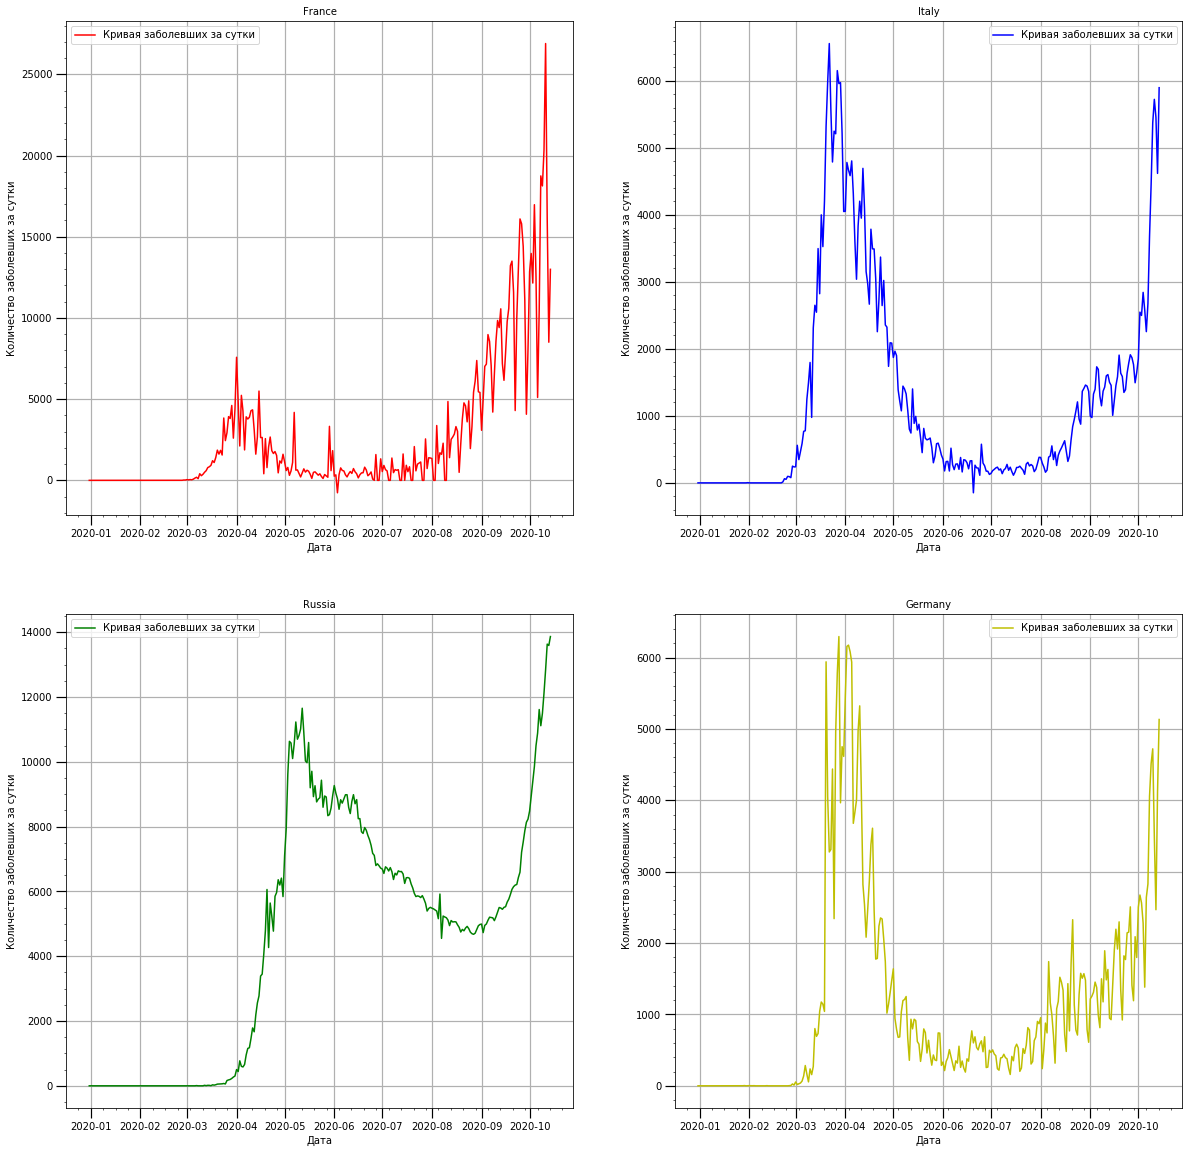

In [46]:
def setupChart(country_name, ax, data_set, chartColor):
    ax.set_title(country_name, fontsize=10)
    ax.set_xlabel('Дата', fontsize=10)
    ax.set_ylabel('Количество заболевших за сутки', fontsize=10)
    ax.grid(which='major', linewidth=1.2)
    ax.plot(data_set['date'], data_set['new_cases'], color=chartColor, label='Кривая заболевших за сутки')
    ax.legend()
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='major', length=10, width=1.2)
    return ax

def createGroup():
    france_data_set = data.loc[data.location == "France"]
    italy_data_set = data.loc[data.location == "Italy"]
    germany_data_set = data.loc[data.location == "Germany"]
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
    ax[0,0] = setupChart("France", ax[0,0], france_data_set, 'r')
    ax[0,1] = setupChart("Italy", ax[0,1], italy_data_set, 'b')
    ax[1,0] = setupChart("Russia", ax[1,0], russia_data_set, 'g')
    ax[1,1] = setupChart("Germany", ax[1,1], germany_data_set, 'y')
    plt.show()

createGroup()

Сверху приведено графическое представление заболевших за сутки в странах: Франция, Италия, Россия, Германия. Из графиков видно, что на октябрь 2020 года во всех странах происходит рост числа заболевших. Так же видно, что наибольший прирост заболевших во Франции. В Германии и Италии несмотря на рост числа заболевших в октябре, все еще не превышены текущие максимумы, достигнутые в марте.

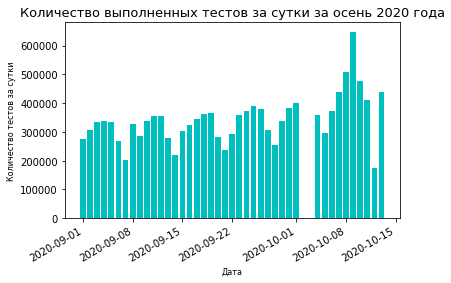

In [47]:
def checkTestsForAutumn():
    plt.bar(russia_data_set['date'][-44:-1], russia_data_set['new_tests'][-44:-1], color = 'c' )
    plt.gcf().autofmt_xdate()
    plt.title("Количество выполненных тестов за сутки за осень 2020 года", fontsize=13)
    plt.xlabel('Дата', fontsize=8)
    plt.ylabel("Количество тестов за сутки", fontsize=8)
    plt.show()
    
checkTestsForAutumn()

На столбчатой диаграмме отражено количество проведенных в России тестов на covid-19 за осенний период. Можно увидеть, что за осень в день проводилось не меньше 200 тысяч тестов (за исключением одного дня).

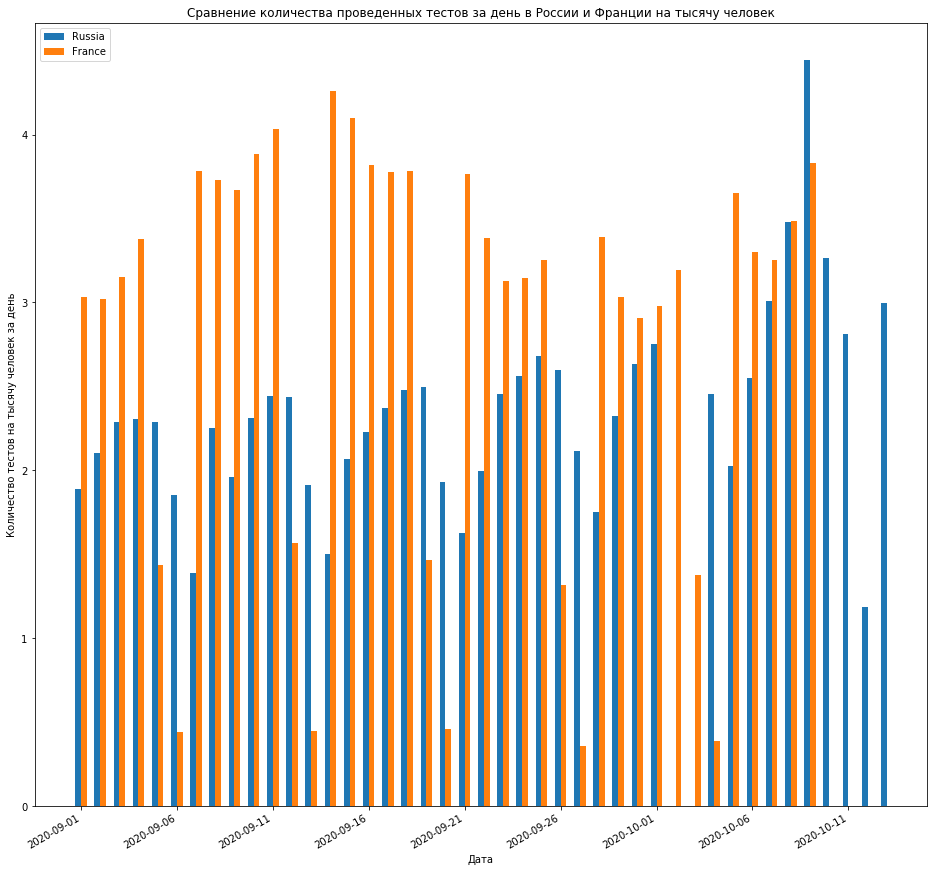

In [72]:
def compareTestsRusFrance():
    width = 0.3
    france_data_set = data.loc[data.location == "France"]
    fig, ax = plt.subplots(figsize=(16, 16))
    x = numpy.arange(len(russia_data_set['date'][-44:-1]))
    rects1 = ax.bar(x - width/2, russia_data_set['new_tests_per_thousand'][-44:-1], width, label='Russia')
    rects2 = ax.bar(x + width/2, france_data_set['new_tests_per_thousand'][-44:-1], width, label='France')
    ax.set_title('Сравнение количества проведенных тестов за день в России и Франции на тысячу человек')
    ax.set_xlabel('Дата', fontsize=10)
    ax.set_ylabel('Количество тестов на тысячу человек за день', fontsize=10)
    ax.set_xticks(x[::5])
#     x_lab = []
#     for i in russia_data_set['date'][-44:-1]:
#         str(i)
#         x_lab.append(i[5:9])
    ax.set_xticklabels(russia_data_set['date'][-44:-1].apply(lambda d: d.date())[::5])
    plt.gcf().autofmt_xdate()
    ax.legend()
    plt.show()

compareTestsRusFrance()


Из приведенной диаграммы видно, что с начала осени примерно до 5-го октября во Франции проводилось больше тестов чем в России по будним дням (разница около 1-2 человек на тысячу), по выходным дням за этот период тестов проводилось больше в России. С 5-го по 9-е октября количество проведенных тестов на тысячу человек выровнялось.

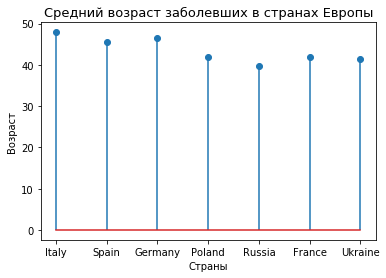

In [76]:
def checkMedianAge(country):
    return data[data["location"] == country]["median_age"].max()

def compareMedianAgeEurope():
    ages = []
    labels = ["Italy", "Spain", "Germany", "Poland", "Russia", "France", "Ukraine"]
    for label in labels:
        ages.append(checkMedianAge(label))
    plt.stem(labels,ages, use_line_collection = True)
    plt.title("Средний возраст заболевших в странах Европы", fontsize=13)
    plt.xlabel('Страны', fontsize=10)
    plt.ylabel("Возраст", fontsize=10)
    plt.show()

compareMedianAgeEurope()

На графике видно, что средний возраст заболевших в представленных странах Европы находится в диапазоне от 40 до 50-ти лет. Наибольшее значение соответсвует Италии, наименьшее России. 

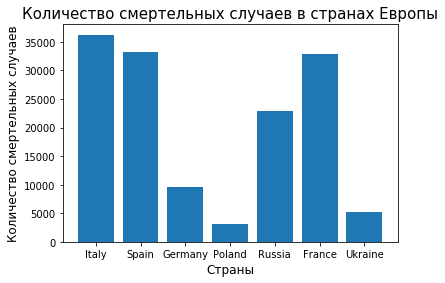

In [77]:
def checkTotalDeath(country):
    return data[data["location"] == country]["total_deaths"].max()

def compareTotalDeathEurope():
    total_deaths = []
    labels = ["Italy", "Spain", "Germany", "Poland", "Russia", "France", "Ukraine"]
    for label in labels:
        total_deaths.append(checkTotalDeath(label))
    plt.bar(labels,total_deaths)
    plt.title("Количество смертельных случаев в странах Европы", fontsize=15)
    plt.xlabel('Страны', fontsize=12)
    plt.ylabel("Количество смертельных случаев", fontsize=12)
    plt.show()

compareTotalDeathEurope()

Из приведенной диаграммы видно, что наибольшее количество смертельных случаев было зафиксировано в Италии. Наименьшее количество в Польше. Россия занимает промежуточное положение в данном сравнении.